<div style="text-align:center"><img src="https://hackmd.io/_uploads/H1ZOOXMRh.png" /></div>


---

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

| Matrícula   | Nome do Acadêmico          |
| ----------- | -------------------------- |
| **1975660** | Felipe Paes de Lima        |
| **3972217** | Marlon Luciano da Silva    |
| **4469827** | Nazaré Aline Sá de Azevedo |
| **4518087** | Roger da Rosa Szortyka     |
| **4525523** | Sandro Loch                |

## Previsão de Epidemias de Dengue Utilizando Modelos de Aprendizado de Máquina: Um Estudo com Dados do Sistema Infodengue


  A **dengue** é a doença viral urbana mais prevalente nas Américas, principalmente no Brasil. É uma doença febril que tem se mostrado de grande importância em saúde pública nos últimos anos[[**4**]](#Referências-Bibliográficas).  Segundo a Organização Mundial da Saúde (OMS), o Brasil é o país mais afetado[[**5**]](#Referências-Bibliográficas). Nesse contexto, a aplicação de técnicas de Machine Learning pode ser uma ferramenta valiosa para a previsão e prevenção de surtos de dengue.

### Objetivo

O objetivo deste projeto é desenvolver modelos de aprendizado de máquina capazes de **prever incidências de dengue**, com base em dados históricos do Sistema Infodengue, e tem como foco a análise e previsão de notificações de casos de dengue no território brasileiro. É importante destacar que, dada a relevância do estado do **Ceará** em termos de incidência da doença, optamos por concentrar nossa análise nessa região. Durante o período selecionado para esta pesquisa, o Ceará registrou uma quantidade considerável de casos de dengue, justificando nossa escolha por esse estado como o principal objeto de estudo.
 

<small>*Nota*: *A previsão de surtos de doenças como a dengue envolve vários fatores, incluindo vigilância epidemiológica, monitoramento de vetores e intervenções de saúde pública. Portanto, modelos de previsão devem ser usados em conjunto com outras informações para tomar decisões informadas sobre medidas de controle e prevenção*</small>


### Especificação Técnica

**Dataset:**  Utilizamos o banco de dados do Sistema Infodengue, que contém informações
sobre notificações de dengue. Os dados foram formatados em um arquivo CSV e incluem campos
como geocódigo do município, nome do município, estado do município, semana epidemiológica e ano
de notificação.

**Formato:**  A base de dados encontra-se em **formato CSV**. Possui **10 colunas**, **1.425.240  observações**, em que cada observação corresponde à uma notificação no estado do **Ceará** (CE).

**Descrição das Features:** A tabela abaixo descreve mais detalhadamente a composição do conjunto de dados.

| **Coluna**     | **Tipo**         | **Descrição**                                                           | **Exemplo**  |
|----------------|------------------|-------------------------------------------------------------------------|--------------|
| uf             | texto (str)      | Nome da unidade federativa do Brasil                                    | Minas Gerais |
| geocodigo      | número (int64)   | Código IBGE associado aos município brasileiros composto por 7 digitos  | 4209102      |
| nome_municipio | texto (str)      | Nome do município                                                       | Joinville    |
| dt_notific     | data (Timestamp) | Data da notificação em format ISO 8601                                  | 2020-07-22   |
| se_notif       | número (int64)   | Semana em que ocorreu a notificação                                     | 18           |
| ano_notif      | número (int64)   | Ano em que ocorreu a notificação                                        | 2022         |
| temp_med       | número (float64) | Temperatura média em graus Celsius                                      | 20.466202    |
| precip_med     | número (float64) | Precipitação média                                                      | 0.035414     |
| pressao_med    | número (float64) | Pressão atmosférica média                                               | 1.005391     |
| umid_med       | número (float64) | Umidade relativa do ar média                                            | 87.35066     |

**Métodos de Pré-processamento:** Um dos principais destaques nas tarefas de pré-processamento deste projeto foi a extração e transformação necessárias para obtenção deste conjunto de dados (detalhes na seção *Metodologia para Extração de Dados*). Em posse dos dados, outras operações de pré-processamento foram necessárias, destacando-se:
  - Extração de dados (mais detalhes podem ser encontrados em [**Metodologia para Extração de Dados**](##Metodologia-para-Extração-de-Dados))
  - Agrupamento e/ou categorização dos dados, gerando uma nova coluna com nossa variável de saída (quantdade total de notificações ou ocorrências).
  - Agrupamento dos dados em intervalos semanais (semanas epidemológicas).
  - Filtragem para geração de nova coluna com valor total de notificações da semana posteior.
  
**Modo de Aprendizado**: Supervisionado.

**Tarefa de Aprendizado:** Será aplicada a tarefa de Regressão.

**Algoritmos Avaliados:** Random Forest, Decision Tree, Gradient Boosting e Ada Boost .

**Métricas Utilizadas:** Raiz do erro quadrático médio (RMSE, do inglês Root Mean Squared Error) e R². ([**Nogueira, 2020**](#Referências-Bibliográficas). p. 132)

### Metodologia para Extração de Dados 

#### 1. Extração, Transformação e Inserção de Dados de Notificações de Casos no Banco de Dados do Infodengue
##### Sistema Infodengue usando a API do PySUS por meio do script AlertaDengue

Nesta seção, descreveremos detalhadamente o processo de pré-processamento de dados realizado pelo script *pysus.py* do [AlertaDengue](https://github.com/AlertaDengue/AlertaDengue/blob/main/AlertaDengue/dbf/pysus.py), Os dados são coletados do [DataSUS](https://datasus.saude.gov.br/) por meio da  biblioteca [PySUS](https://github.com/AlertaDengue/pysus), abordando a coleta, tratamento e inserção dos dados, passando por várias transformações que são, por fim, inseridos no banco de dados da dengue no sistema [Infodengue](https://info.dengue.mat.br/informacoes/), utilizando o PostgreSQL como mecanismo de gerenciamento de banco de dados.

- **Coleta de Dados** : O script inicia o processo de pré-processamento coletando dados do DataSUS. Isso envolve a aquisição de informações sobre casos de doenças específicas, como dengue, chikungunya e zika, para um determinado ano.
- **Cálculo de Campos Relevantes** : Os dados coletados não estão prontos para serem inseridos no banco de dados do sistema Infodengue. Portanto, o script executa uma série de cálculos para criar campos adicionais e corrigir dados inconsistentes ou mal formatados. Isso inclui o cálculo da data de nascimento com base na idade do paciente, a adição de dígitos verificadores aos geocódigos municipais e a correção de códigos CID10 de doenças.
- **Transformação de Dados** : O script realiza transformações nos dados para garantir que eles atendam aos requisitos do sistema Infodengue. Isso inclui a padronização de campos, como a representação da semana epidemiológica brasileira.
- **Inserção no Banco de Dados** : Após a coleta e transformação dos dados, o script estabelece uma conexão com o banco de dados PostgreSQL do sistema Infodengue. Ele insere os dados pré-processados no banco de dados, seguindo uma estratégia de inserção que evita a duplicação de registros. Isso garante que os dados estejam prontos para análises futuras e disponíveis para consulta no sistema Infodengue.
- **Registro de Erros**: Durante o processo de pré-processamento e inserção, o script monitora possíveis erros ou exceções. Em caso de erro, ele registra informações detalhadas em um arquivo de log para fins de depuração e auditoria.

#### Os principais componentes e funcionalidades do script [pysus.py](https://github.com/AlertaDengue/AlertaDengue/blob/main/AlertaDengue/dbf/pysus.py) incluem:

- **settings (AlertaDengue.ad_main)** : Essa importação específica refere-se a configurações personalizadas definidas nas conficurações principais do projeto AlertaDengue. Essas configurações incluem detalhes de conexão com o banco de dados PostgreSQL.

- **episem (AlertaDengue.dados.episem)** : A biblioteca episem é utilizada para cálculos relacionados a semanas epidemiológicas, que são cruciais para a análise de dados relacionados à dengue.

- **SINAN (pysus.online_data)** : SINAN é uma ferramenta que permite o acesso a dados online, incluindo a obtenção de dados do DataSUS. Neste contexto, ele é usado para baixar dados relacionados à dengue.

<details><summary><b>Para realizar essas operações, o faz uso das seguintes bibliotecas de terceiros</b></summary>

- **numpy (np)** : Esta biblioteca é amplamente usada para cálculos matemáticos e operações em arrays multidimensionais. No contexto deste script, o numpy é utilizado para efetuar cálculos em campos como idade e geocódigos municipais.

- **pandas (pd)** : O pandas é uma biblioteca poderosa para manipulação e análise de dados. Aqui, o pandas é empregado para estruturar e limpar os dados, incluindo a seleção de colunas relevantes, ajuste de tipos de dados e tratamento de valores ausentes.

- **psycopg2** : Essa biblioteca possibilita a conexão com um banco de dados PostgreSQL. O script a utiliza para se conectar ao banco de dados do sistema Infodengue e inserir os dados processados.

- **pathlib** : A biblioteca pathlib é usada para lidar com caminhos de arquivo e diretório de forma eficiente. Ela auxilia na organização e manipulação de arquivos, incluindo a leitura de arquivos Parquet e a criação de diretórios para armazenamento temporário.

- **datetime e timedelta** : Essas bibliotecas nativas do Python são usadas para manipulação de datas e horários. São fundamentais para calcular datas de nascimento a partir da idade dos pacientes e para calcular datas epidemiológicas.

- **glob** : A biblioteca glob é útil para pesquisa de arquivos em um diretório com base em padrões de nome de arquivo. Aqui, ela é usada para encontrar e processar múltiplos arquivos Parquet com dados do DataSUS.

- **logging** : O módulo de logging é usado para registrar informações relevantes durante a execução do script, auxiliando na depuração e no monitoramento.

</details>


#### 2. Extração, Transformação e Inserção de Dados Climáticos no Banco de Dados do Infodengue
##### Sistema Infodengue usando a API do Copernicus por meio do script [copebr.py](https://github.com/osl-incubator/satellite-weather-downloader/blob/main/satellite/weather/copebr.py) Satellite-Weather-Downloader

O [Satellite-Weather-Downloader](https://github.com/osl-incubator/satellite-weather-downloader) captura os dados meteorológicos da API [Copernicus](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels). Esta biblioteca oferece funcionalidades para capturar, converter e processar os dados para uso em análises meteorológicas no contexto brasileiro.

#### Os principais componentes e funcionalidades do script [copebr.py](https://github.com/osl-incubator/satellite-weather-downloader/blob/main/satellite/weather/copebr.py#L230) do **Satellite-Weather-Downloader** incluem:

- **CopeBRDatasetExtension** : Esta classe é uma extensão para objetos xr.Dataset que permite adicionar funcionalidades específicas do Brasil para dados meteorológicos.

- **Métodos como to_dataframe e to_sql** : Permitem converter os dados do conjunto de dados xarray em estruturas de dados como DataFrames do Pandas e inseri-los em um banco de dados SQL, respectivamente.

- **Métodos como _geocode_ds e _geocode_to_dataframe** : São usados para processar e extrair dados meteorológicos específicos para uma localização geográfica (identificada pelo IBGE geocode).

- **_convert_to_br_units** : É usado para converter unidades de medidas para padrões brasileiros, como a conversão de Kelvin para Celsius, metros para milímetros e Pascal para ATM.

- **_get_latlons** : Extrai as coordenadas de latitude e longitude para um determinado geocode IBGE de uma cidade brasileira.

*Destacamos a função [_convert_to_br_units](https://github.com/osl-incubator/satellite-weather-downloader/blob/main/satellite/weather/copebr.py#L230) que é responsável por converter unidades de medidas em um conjunto de dados xarray para padrões brasileiros. Isso é importante porque as unidades de medidas usadas em dados meteorológicos podem variar dependendo da origem dos dados, e é útil padronizá-las para uma análise mais consistente no contexto brasileiro.*

#### Explicação passo a passo do que esta função faz:

  1. Recebe um conjunto de dados xr.Dataset como entrada.
  2. Verifica quais variáveis de dados estão presentes no conjunto de dados (por meio da lista de nomes das variáveis vars).
  3. Para cada variável presente no conjunto de dados, verifica se ela corresponde a alguma variável específica de acordo com seu nome (por exemplo, "t2m" para temperatura em Kelvin, "tp" para precipitação em metros, "msl" para pressão em Pascal).
  4. Se uma variável corresponder a alguma dessas variáveis específicas, a função realiza as seguintes conversões de unidades:
  5. Para "t2m" (temperatura em Kelvin), ela converte para Celsius subtraindo 273.15 e define as unidades e o nome longo apropriados.
  6. Para "d2m" (temperatura do ponto de orvalho em Kelvin), ela realiza o mesmo cálculo de conversão para Celsius e também calcula a umidade relativa do ar em porcentagem usando a fórmula de [Buck](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_Arden_Buck).
  7. Para "tp" (precipitação em metros), ela converte para milímetros multiplicando por 1000 e arredonda para 5 casas decimais. Também define as unidades e o nome longo apropriados.
  8. Para "msl" (pressão ao nível do mar em Pascal), ela converte para ATM multiplicando por um fator específico e define as unidades e o nome longo apropriados.

*A função retorna o conjunto de dados resultante com as unidades convertidas e os nomes convencionados.*

<details><summary><b>Para realizar essas operações, script o faz uso das seguintes bibliotecas de terceiros</b></summary>

- **dask** : Utilizado para computação paralela e assíncrona, útil para processamento eficiente de grandes volumes de dados.

- **dask.array** : Oferece suporte para arrays Dask, que são úteis para computação paralela em dados multidimensionais, como dados climáticos.

- **dask.dataframe** : Usado para trabalhar com estruturas de dados semelhantes a DataFrames em um ambiente Dask.

- **numpy** : Amplamente utilizado para cálculos matemáticos e operações em arrays multidimensionais.

- **xarray** : Essencial para trabalhar com dados multidimensionais, como dados climáticos, de forma eficiente.

- **loguru** : Biblioteca de registro de eventos usada para registrar informações durante a execução do script, auxiliando na depuração e no monitoramento.

- **sqlalchemy.engine.Connectable** : Usado para estabelecer conexões com bancos de dados SQL, como o PostgreSQL, para inserir dados processados.

</details>
</br>

Em resumo, o pré-processamento de dados realizado pelos scripts é uma etapa crítica que visa garantir a qualidade, consistência e integridade dos dados coletados antes de serem incorporados ao banco de dados do sistema Infodengue.


#### Agrupamento e/ou categorização dos dados
##### Consulta no banco de dados Infodengue e exportação do conjunto de dados em formato CSV
Para a obtenção dos dados relevantes necessários para o treinamento dos modelos de machine learning, foi criado uma função **weather_notific** especifica no script do repositório [ml-dengue-predict](https://github.com/esloch/ml-dengue-predict) para selecionar e filtrar os campos e dados pertinentes em uma série temporal. Essa série temporal abrange um período significativo, de 2010 a 2023, e envolve quatro estados e, os campos selecionados incluem informações de Notificações e Varáveis Climáticas.

Para isso e script [fetchinfodenguedata.py](https://github.com/esloch/ml-dengue-predict/blob/main/fetchinfodenguedata/fetchinfodenguedata.py) é responsável por recuperar dados de clima e notificação para um estado específico e um intervalo de datas fornecido. Ele realiza uma consulta que envolve várias junções de tabelas para combinar dados meteorológicos e de notificação relevantes para análises posteriores.

- Query *[weather_notific](https://github.com/esloch/ml-dengue-predict/blob/main/fetchinfodenguedata/fetchinfodenguedata.py#L162)*

```Python
# SQL query to retrieve weather and notification data 
SQL = f"""
SELECT
    m.uf,
    w.geocodigo,
    m.nome AS nome_municipio,
    n.dt_notific,
    n.se_notif,
    n.ano_notif,
    w.temp_med,
    w.precip_med,
    w.pressao_med,
    w.umid_med
FROM weather.copernicus_brasil w
JOIN "Dengue_global"."Municipio" m
ON w.geocodigo = m.geocodigo
JOIN "Municipio"."Notificacao" n
ON w.date = n.dt_notific AND w.geocodigo = n.municipio_geocodigo
WHERE
    w.date BETWEEN '{start_date}' AND '{end_date}'
AND m.uf = '{state}';
"""

with DB_ENGINE.connect() as conn:
    print("Fetching climate and notification data for: ", state)
    df = pd.read_sql_query(SQL, conn)

fname = f"weather_notification_{uf}_{start_date}_{end_date}"

return fname, df
```

Após a recuperação desses dados, eles são exportados para um arquivo CSV. Esse arquivo CSV contém os dados que serão usados no treinamento dos modelos de machine learning, permitindo análises avançadas e a criação de modelos preditivos relacionados à dengue e outras doenças transmitidas por vetores. 

---

### Pré-Processamento

#### Importando Bibliotecas

In [21]:
# Primeiro importamos as bibliotecas e módulos necessários
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # silence warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Conexão com o Dataset utilizado

In [22]:
# Criar um dataframe usando a função `read_csv` do pandas.
data_path = "https://info.dengue.mat.br/datasets/notificacao/csv/weather_notification_CE_2010-01-01_2023-10-21.csv"


df = pd.read_csv(data_path,index_col=[0]).reset_index(drop=True)
print("Exibir informação dos campos e tipos de dados usando a função info() do pandas: \n")
df.info()

Exibir informação dos campos e tipos de dados usando a função info() do pandas: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425240 entries, 0 to 1425239
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   uf              1425240 non-null  object 
 1   geocodigo       1425240 non-null  int64  
 2   nome_municipio  1425240 non-null  object 
 3   dt_notific      1425240 non-null  object 
 4   se_notif        1425240 non-null  int64  
 5   ano_notif       1425240 non-null  int64  
 6   temp_med        1425240 non-null  float64
 7   precip_med      1425240 non-null  float64
 8   pressao_med     1425240 non-null  float64
 9   umid_med        1425240 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 108.7+ MB


In [23]:
print("Exibir os 5 primeiros registros dos dados usando a função head() do pandas: \n")
df.head()

Exibir os 5 primeiros registros dos dados usando a função head() do pandas: 



,uf,geocodigo,nome_municipio,dt_notific,se_notif,ano_notif,temp_med,precip_med,pressao_med,umid_med
0,Ceará,2309805,Pacoti,2020-03-31,14,2020,25.879807,0.364901,0.996453,88.508120
1,Ceará,2310852,Pindoretama,2020-04-13,16,2020,27.737236,0.068862,0.997939,81.584460
2,Ceará,2304400,Fortaleza,2020-07-02,27,2020,26.324260,0.020131,0.999316,79.740380
3,Ceará,2304400,Fortaleza,2020-07-02,27,2020,26.324260,0.020131,0.999316,79.740380
4,Ceará,2311801,Russas,2020-08-13,33,2020,27.482380,0.000000,0.999362,61.788048


### Análise Exploratória dos Dados

Na **Análise Exploratória dos Dados** realizamos alguns agrupamentos e visualizacões para uma melhor compreensão do conjunto de dados, e também investigar as relações entre casos de dengue, temperatura e umidade ao longo do tempo.

In [4]:
# Selecionar as colunas relevantes do DataFrame original
cols = ['uf', 'geocodigo', 'nome_municipio', 'dt_notific', 'se_notif', 'ano_notif', 'temp_med', 'umid_med']

# Agrupar os dados e calcular estatísticas
df_combined = df[cols] \
    .groupby(['uf', 'nome_municipio', 'geocodigo', 'ano_notif', 'se_notif']) \
    .agg(casos_notif=('dt_notific', 'count'),
         temp_med=('temp_med', 'mean'),
         umid_med=('umid_med', 'mean')).reset_index() \
    .sort_values(['ano_notif', 'se_notif'], ascending=[False, False])


O código a acima realiza uma etapa crucial de pré-processamento, agregando notificações de casos de dengue por semana epidemiológica e ano, calculando métricas climáticas médias e contando o número total de casos em cada semana. Isso prepara os dados para análises posteriores e a construção de modelos de previsão:

1. **Objetivo**:
   - O objetivo principal do projeto de Machine Learning é prever os casos de dengue que ocorrerão na próxima semana com base em informações históricas e variáveis climáticas.
   - Cada linha no conjunto de dados representa uma notificação de incidência de dengue em um determinado local (geocódigo) e data de notificação (dt_notific). </p>


2. **Seleção de Colunas Relevantes**:
   - No início, é selecionado o subconjunto das colunas do DataFrame original `df`. Essas colunas são consideradas relevantes para a análise e previsão de casos de dengue.
   - As colunas selecionadas incluem:
     - geocodigo: O código que identifica o local.
     - nome_municipio: O nome do município.
     - dt_notific: A data da notificação.
     - se_notif: A semana epidemiológica da notificação.
     - ano_notif: O ano da notificação.
     - precip_med: A precipitação média.
     - pressao_med: A pressão atmosférica média.
     - temp_med: A temperatura média.
     - umid_med: A umidade relativa média.</p>


3. **Agrupamento por Semana Epidemiológica e Ano**:
   - No próximo passo é agrupado as notificações com base nas colunas geocodigo, se_notif e ano_notif. Isso significa que estamos agregando notificações que ocorreram no mesmo local, na mesma semana epidemiológica e no mesmo ano.
   - A função `groupby` é usada para agrupar os dados com base nessas colunas.</p>

4. **Agregação das Variáveis de Interesse**:
   - Agora, o código utiliza a função `agg` para agregar várias métricas estatísticas das variáveis climáticas (precip_med, pressao_med, temp_med e umid_med) e também conta o número de notificações em uma semana.
   - Para cada grupo, ele calcula a média das variáveis climáticas e a contagem total de notificações (`casos_notif`).</p>

5. **Ordenação dos Dados**:
   - Após a agregação, os dados são ordenados com base nos anos (`ano_notif`) e semanas epidemiológicas (`se_notif`) em ordem decrescente. Isso permite que os dados sejam organizados de forma temporal, com os registros mais recentes no topo.</p>

6. **Resultado Final**:
   - O resultado final é armazenado no DataFrame `df_combined`.

#### Imprimir o número total de registros e mostrar as primeiras linhas do DataFrame

In [5]:
print('Total de registros: ', len(df_combined), '\n')
df_combined.head()

Total de registros:  62669 



,uf,nome_municipio,geocodigo,ano_notif,se_notif,casos_notif,temp_med,umid_med
3679,Ceará,Aracati,2301109,2023,40,1,27.781410,70.681980
6753,Ceará,Barbalha,2301901,2023,40,2,27.557560,40.220620
8712,Ceará,Beberibe,2302206,2023,40,2,27.246143,75.651260
10231,Ceará,Brejo Santo,2302503,2023,40,1,29.353947,38.310005
13079,Ceará,Cariús,2303303,2023,40,4,29.976482,47.771520


---

### Gráfico de Dispersão dos Casos de Dengue em Relação às Variáveis Climáticas


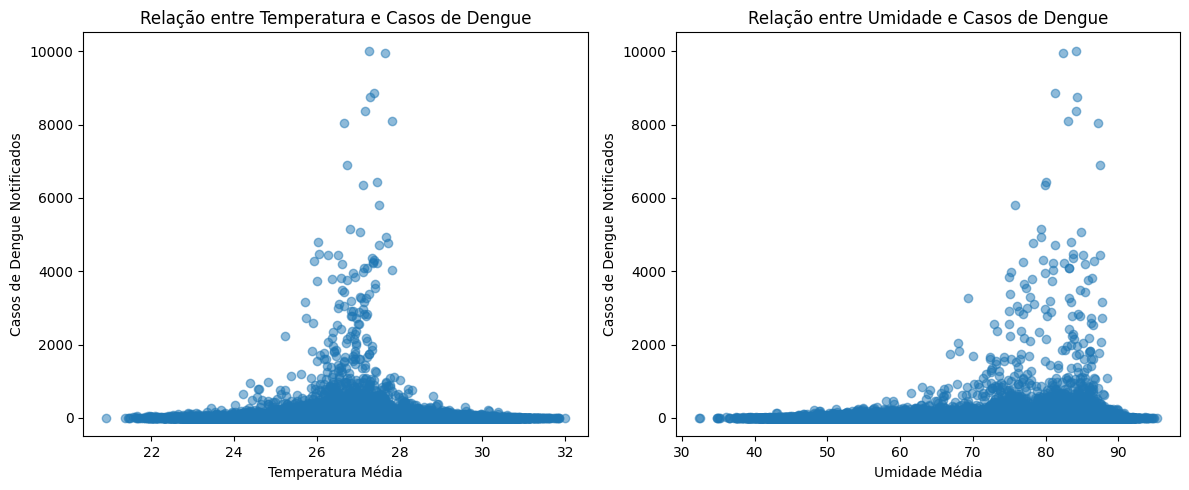

In [6]:
import matplotlib.pyplot as plt

# Configurar subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Temperatura Média vs. Casos Notificados
axs[0].scatter(df_combined['temp_med'], df_combined['casos_notif'], alpha=0.5)
axs[0].set_xlabel('Temperatura Média')
axs[0].set_ylabel('Casos de Dengue Notificados')
axs[0].set_title('Relação entre Temperatura e Casos de Dengue')

# Gráfico 2: Umidade Média vs. Casos Notificados
axs[1].scatter(df_combined['umid_med'], df_combined['casos_notif'], alpha=0.5)
axs[1].set_xlabel('Umidade Média')
axs[1].set_ylabel('Casos de Dengue Notificados')
axs[1].set_title('Relação entre Umidade e Casos de Dengue')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()


### Incidência de Casos Notificados por 1000.000 Habitantes em Relação à Temperatura Média e Umidade Média

Os dados foram ajustados para refletir a incidência por 1000.000 habitantes, levando em consideração a população total do estado do Ceará, conforme o Censo do IBGE, que abrange os 184 municípios. A visualização busca proporcionar insights sobre como a incidência de casos de dengue varia em relação às condições climáticas, considerando a densidade populacional de cada município.

##### Fórmula Incidência:


\begin{equation}
 \text{Incidência} = \left( \frac{\text{Casos Notificados}}{\text{População Total do Estado}} \right) \times 100000
\end{equation}



O gráfico apresenta uma visualização da incidência de casos notificados de dengue por 1000 habitantes em relação aos níveis de temperatura média e umidade média para os municípios do estado do Ceará. Cada bolha representa um município, onde o tamanho reflete a quantidade de casos notificados, e a cor indica a incidência, indo de tons mais claros a mais escura.

/tmp/ipykernel_96649/761234207.py:17: UserWarning: 
The palette list has fewer values (6) than needed (726) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


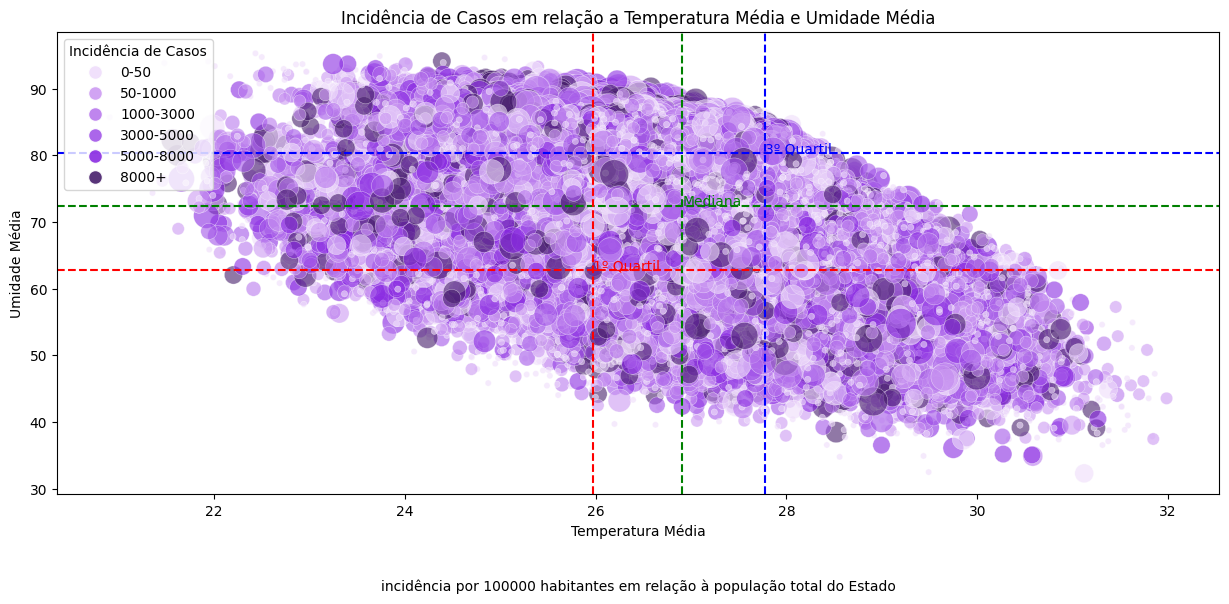

In [7]:
# População total do estado do Ceará Censo 2022
populacao_ceara = 8794957

# Calcula o número de casos para refletir a incidência por 100000 habitantes em uma nova coluna
df_combined['casos_incid'] = (df_combined['casos_notif'] / populacao_ceara) * 100000

df_combined['log_casos_incid'] = np.log(df_combined['casos_incid'])

# Cria uma categoria única para incidência de 1/1000
df_combined['incidencia_cat'] = '1/1000'

colors = ['#efddfb', '#cc9af2', '#b878ed', '#a255e8', '#8a2be2', '#461e6b']


# Scatter plot com seaborn e escala logarítmica para o tamanho das bolhas
plt.figure(figsize=(15, 6))
sns.scatterplot(
    x='temp_med',
    y='umid_med',
    hue=df_combined['log_casos_incid'],
    size=df_combined['log_casos_incid'],  # Aplica escala logarítmica ao tamanho das bolhas
    data=df_combined,
    palette=colors,
    sizes=(20, 800),
    alpha=0.6
)


# Calcular e traçar quartis e medianas para os eixos x e y
quartis_temp = np.percentile(df_combined['temp_med'], [25, 50, 75])
quartis_umid = np.percentile(df_combined['umid_med'], [25, 50, 75])

plt.axhline(quartis_umid[0], color='r', linestyle='--')
plt.axhline(quartis_umid[1], color='g', linestyle='--')
plt.axhline(quartis_umid[2], color='b', linestyle='--')

plt.axvline(quartis_temp[0], color='r', linestyle='--')
plt.axvline(quartis_temp[1], color='g', linestyle='--')
plt.axvline(quartis_temp[2], color='b', linestyle='--')

# Adicionar legenda para quartis e medianas
plt.text(quartis_temp[0], quartis_umid[0], '1º Quartil', color='r', fontsize=10)
plt.text(quartis_temp[1], quartis_umid[1], 'Mediana', color='g', fontsize=10)
plt.text(quartis_temp[2], quartis_umid[2], '3º Quartil', color='b', fontsize=10)

# Ajusta a legenda
legend_labels = ['0-50', '50-1000', '1000-3000', '3000-5000', '5000-8000', '8000+']
legend_handles = [plt.Line2D([], [], marker='o', color='w', markersize=10, markerfacecolor=colors[i], alpha=0.9) for i in range(len(legend_labels))]
plt.legend(handles=legend_handles, labels=legend_labels, title='Incidência de Casos', loc='upper left')

plt.xlabel('Temperatura Média')
plt.ylabel('Umidade Média')
plt.title('Incidência de Casos em relação a Temperatura Média e Umidade Média')
plt.text(0.5, -0.2, 'incidência por 100000 habitantes em relação à população total do Estado',
         horizontalalignment='center',
         verticalalignment='center',
         transform=plt.gca().transAxes)
plt.show()


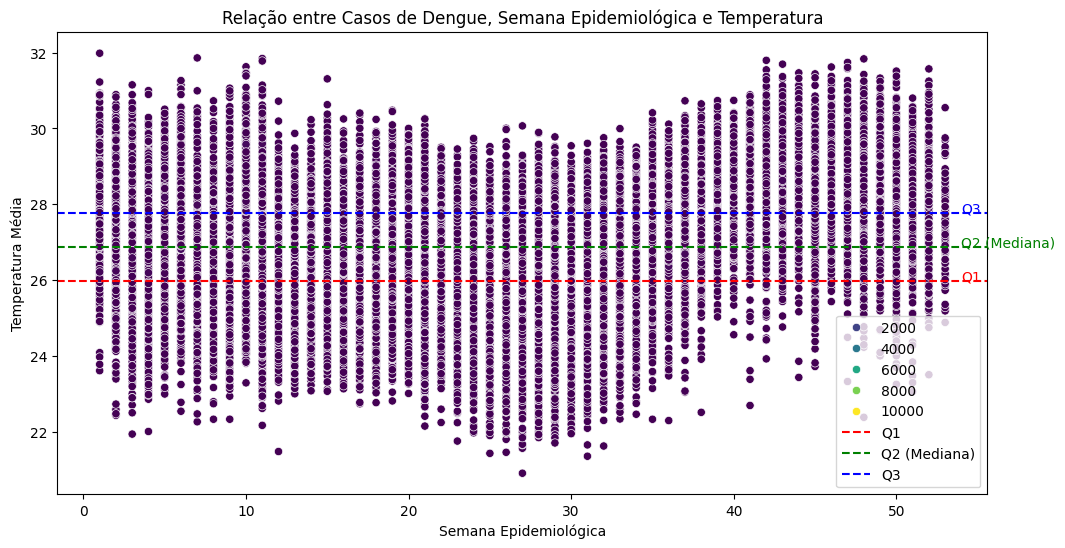

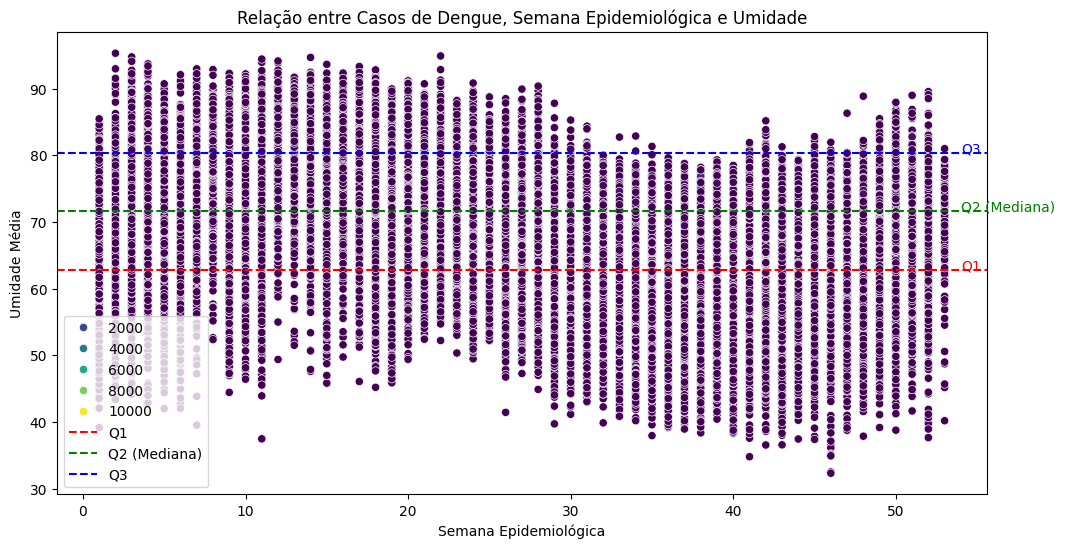

In [8]:
# Gráfico de dispersão de casos de dengue e temperatura
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_combined, 
       x='se_notif', 
       y='temp_med', 
       hue='casos_notif', 
       palette='viridis'
)

# Calcular os quartis da temperatura
Q1 = df_combined['temp_med'].quantile(0.25)
Q3 = df_combined['temp_med'].quantile(0.75)

# Desenhar linhas verticais para dividir os dados em quartis
plt.axhline(Q1, color='r', linestyle='--', label='Q1')
plt.axhline((Q1 + Q3) / 2, color='g', linestyle='--', label='Q2 (Mediana)')
plt.axhline(Q3, color='b', linestyle='--', label='Q3')

# Configurar os rótulos dos quartis
plt.text(df_combined['se_notif'].max() + 1, Q1, 'Q1', color='r')
plt.text(df_combined['se_notif'].max() + 1, (Q1 + Q3) / 2, 'Q2 (Mediana)', color='g')
plt.text(df_combined['se_notif'].max() + 1, Q3, 'Q3', color='b')

plt.xlabel('Semana Epidemiológica')
plt.ylabel('Temperatura Média')
plt.title('Relação entre Casos de Dengue, Semana Epidemiológica e Temperatura')
plt.legend()
plt.show()

# Gráfico de dispersão de casos de dengue e temperatura
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_combined, 
    x='se_notif', 
    y='umid_med', 
    hue='casos_notif', 
    palette='viridis'
)

# Calcular os quartis da temperatura
Q1 = df_combined['umid_med'].quantile(0.25)
Q3 = df_combined['umid_med'].quantile(0.75)

# Desenhar linhas verticais para dividir os dados em quartis
plt.axhline(Q1, color='r', linestyle='--', label='Q1')
plt.axhline((Q1 + Q3) / 2, color='g', linestyle='--', label='Q2 (Mediana)')
plt.axhline(Q3, color='b', linestyle='--', label='Q3')

# Configurar os rótulos dos quartis
plt.text(df_combined['se_notif'].max() + 1, Q1, 'Q1', color='r')
plt.text(df_combined['se_notif'].max() + 1, (Q1 + Q3) / 2, 'Q2 (Mediana)', color='g')
plt.text(df_combined['se_notif'].max() + 1, Q3, 'Q3', color='b')

plt.xlabel('Semana Epidemiológica')
plt.ylabel('Umidade Média')
plt.title('Relação entre Casos de Dengue, Semana Epidemiológica e Umidade')
plt.legend()
plt.show()

#### Municípios com Maior Número de casos

Abaixo realizamos a seleção dos dados e criação de um gráfico onde mostramos os 10 municípios com maior número de casos de dengue entre 2010 e 2023.

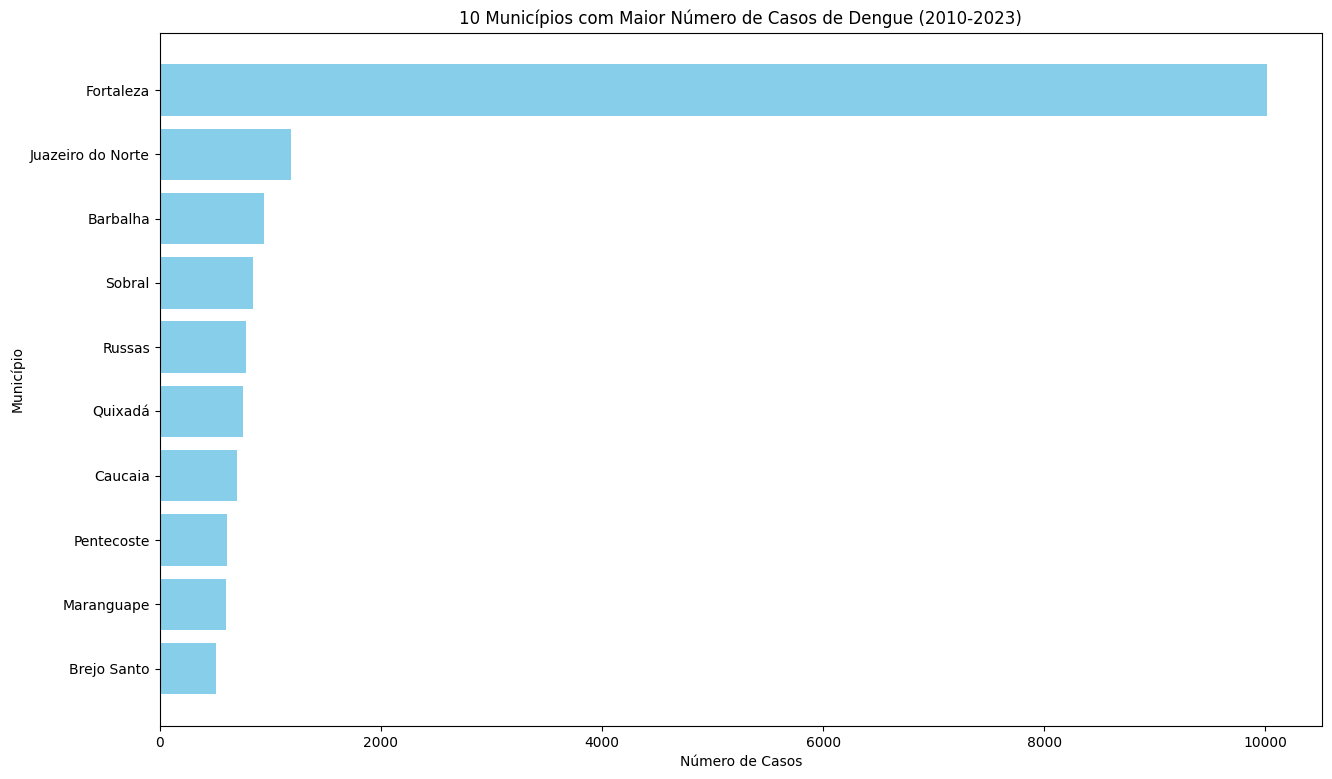

In [9]:
# Encontrar o município com o maior número de casos em cada ano.
max_cases_df = df_combined[df_combined['ano_notif'].between(2010, 2023)]  # Filtra para os anos desejados
max_cases_df = max_cases_df.groupby(['ano_notif', 'geocodigo'])['casos_notif'].max().reset_index()
max_cases_df = max_cases_df.sort_values(by=['casos_notif'], ascending=False)

# Filtrar apenas os municípios com mais casos.
top_10_municipios = max_cases_df.head(24)

# Obter os nomes dos municípios correspondentes.
top_10_municipios = top_10_municipios.merge(
    df_combined[['geocodigo', 'nome_municipio']], on='geocodigo', how='left'
)

# Criar o gráfico de barras horizontais.
plt.figure(figsize=(15, 9))
plt.barh(top_10_municipios['nome_municipio'], top_10_municipios['casos_notif'], color='skyblue')
plt.xlabel('Número de Casos')
plt.ylabel('Município')
plt.title('10 Municípios com Maior Número de Casos de Dengue (2010-2023)')
plt.gca().invert_yaxis()  # Inverte o eixo y para que o maior número de casos fique no topo
plt.show()

---

### Treinando e Testando o Modelo

Realizada a análise exploratória de dados, discutimos sobre qual seria a variável dependente (`y`), ou seja, o valor que desejamos predizer através do uso de algoritmos de aprendizado de máquina. Decidimos por focar nosso estudo em predizer o número de casos notificados, representado pela coluna `casos_notif`.

#### O Algoritmo Random Forest

Ao abordar a previsão do número total de casos notificados (casos_notif), escolhemos o algoritmo Random Forest, amplamente reconhecido para problemas de regressão. Este algoritmo é especialmente eficaz para variáveis contínuas, como no nosso caso, onde buscamos prever o valor numérico que representa o total de casos notificados. A escolha do Random Forest para esta tarefa se baseia em sua capacidade comprovada de combinar várias árvores de decisão, resultando em previsões robustas e precisas para variáveis contínuas.

<small>Nota: O Random Forest é um algoritmo amplamente utilizado tanto para tarefas de regressão quanto para classificação. Entretanto, pelo fato de a variável que desejamos predizer com o algoritmo ser contínua (valor numérico representando o total de casos notificados), utilizamos o Random Forest para executar a tarefa de regressão.</small>


#### Particionando os Dados

Aqui é onde selecionaremos os **atributos preditores** (variáveis independentes), aqueles que serão utilizados para encontrar nossso atributo-alvo (variável dependente), ou seja, o número absoluto de casos notificados de dengue para o Estado do Ceará. Particionaremos os dados com a função `train_test_split` da biblioteca sklearn na proporção **80% para treino** e **20% para teste**, respectivamente.


In [10]:
# Selecionar as colunas relevantes para o modelo
cols = ['ano_notif', 'se_notif', 'casos_notif', 'temp_med', 'umid_med']

# Agregar os dados novamente
df_vis = df_combined[cols].groupby(['ano_notif', 'se_notif']).agg(
    casos_notif=('casos_notif', 'sum'),
    temp_med=('temp_med', 'mean'),
    umid_med=('umid_med', 'mean')).reset_index() \
    .sort_values(['ano_notif', 'se_notif'], ascending=[False, False])

# para gerar nosso modelo, basta criarmos uma instância 
# da classe RandomForestRegressor da biblioteca sklearn
# Criar os conjuntos de treinamento e teste
X = df_vis[['se_notif', 'ano_notif', 'temp_med', 'umid_med']]
y = df_vis['casos_notif']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestRegressor(random_state=42)

# Treinando o Modelo com método `fit`
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Importância de cada atributo

**feature_importances_** fornece informações sobre a importância relativa de cada recurso (ou variável) no processo de tomada de decisão do modelo. É uma métrica útil para entender quais recursos estão contribuindo mais para a capacidade preditiva do modelo.

Características com importância muito baixa podem ser excluídas do modelo para simplificá-lo, reduzir o overfitting e acelerar o treinamento.

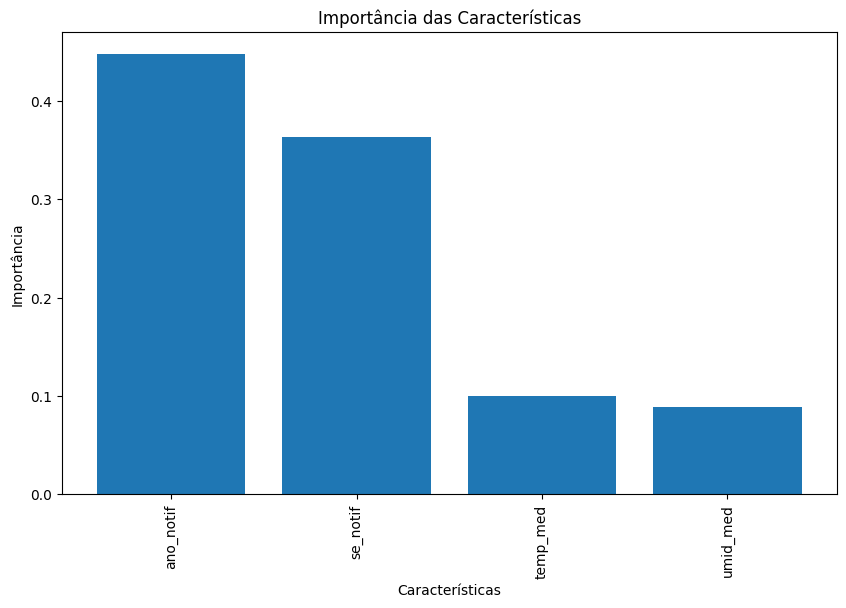

In [11]:
# Obter a importância das características do modelo
feature_importances = random_forest.feature_importances_

# Obter as colunas de características
feature_names = X_train.columns

# Classificar as características por importância
indices = feature_importances.argsort()[::-1]

# Plotar a importância das características
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importância")
plt.show()

In [12]:
# Previsão de nossa variável dependente com o conjunto reservado para testes
y_pred = random_forest.predict(X_test)

#### Avaliação do Modelo

Definimos algumas funções que utilizaremos para obtenção das métricas (`RMSE` e `R²`)   
como definido nas especificações técnicas. Também utilizaremos o método `score` o qual retorna o $r^2$, que determina o quanto nossa variáveis independentes influenciam em nossa variável dependente.

RMSE (Root Mean Square Error): O RMSE é uma métrica que mede a média dos erros quadrados entre as previsões do modelo e os valores reais. Ele fornece uma medida da dispersão dos erros. Quanto menor o valor do RMSE, melhor o modelo está em ajustar-se aos dados.

\begin{equation}
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y-y_j)^2}
\end{equation}

In [13]:
def rmse(y_true, y_pred):
    """Retorna a raiz do erro quadrático médio (RMSE, do inglês Root Mean Squared Error)"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

---



R-squared (R²): O R-squared, também conhecido como coeficiente de determinação, é uma métrica que varia de 0 a 1. Ele representa a proporção da variabilidade nos dados que é explicada pelo modelo. Um valor de R² próximo de 1 indica que o modelo explica uma grande parte da variabilidade nos dados, enquanto um valor próximo de 0 significa que o modelo não explica bem os dados.

\begin{equation}
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
\end{equation}

\begin{equation}
R^2 = 1 - \frac{MSE_{\text{modelo}}}{MSE_{\text{linha de base}}}
\end{equation}


In [14]:
def r2(y_true, y_pred):
    """Retorna o rsquared"""
    return r2_score(y_true, y_pred)

<small>Maiores detalhes sobre as métricas podem ser encontradas no material: [**Machine learning I – Classificação e Regressão**](#Referências-Bibliográficas), página 132.</small>

#### Aplicando as Métricas ao Modelo


Nesta fase, o objetivo principal é medir o desempenho do modelo e determinar quão bem ele está funcionando.  Para obtermos as métricas (RMSE e MAE), devemos utilizar nosso conjunto reservado para testes para obter predições de nosso modelo.



In [15]:
# Calculando RMSE
random_forest_rmse = rmse(y_test, y_pred)

# Calcula o R-squared que  diz o quanto nosso X determina o nosso y
random_forest_rsquared = r2(y_test, y_pred)

print(f'RMSE: {random_forest_rmse}')
print(f'R-squared: {random_forest_rsquared}')

RMSE: 1131.4160725351978
R-squared: 0.8868191211237809


#### Análise de Resultados

Aqui sintetizamos resumidamente os resultados obtidos, evidenciamos as conquistas alcançadas com o projeto, e indicamos limitações, possibilidades e/ou reconsiderações para futuros estudos.

O **RMSE** relativamente baixo e o alto **R²** sugerem que o modelo está fazendo boas previsões e explicando uma grande parte da variabilidade nos dados. Além disso, a análise de importância das variáveis, onde as duas principais variáveis foram `ano_notif` (ano) e `se_notif` (semana epidemológica), reforçam a característica sazonal do vírus.


#### Treinando outros 3 algoritmos de Machine Learning para comparação

Os algoritmos selecionados para comparação com o Random Forest foram:
- Decision Tree
- Gradient Boost
- Ada Boost

#### Decision Tree

Decision Tree (Árvore de Decisão) é um algoritmo que organiza dados em uma estrutura de árvore para fazer previsões, especialmente em tarefas de regressão. Ela divide os dados com base em condições de decisão e fornece previsões nas folhas da árvore. Já o Random Forest (Floresta Aleatória) é uma extensão desse conceito que cria várias árvores de decisão independentes e combina suas previsões para melhorar a precisão e a robustez do modelo, reduzindo o overfitting e aumentando o desempenho geral em tarefas de regressão.

#### Gradient Boosting

O GradientBoost ou Gradient Boosting é um algoritmo de aprendizado de máquina que melhora a precisão das previsões combinando vários modelos de aprendizado fracos, como árvores de decisão simples. Ele funciona construindo sequencialmente novos modelos que corrigem os erros dos modelos anteriores, com foco nas amostras que foram previamente mal previstas. Essa abordagem gradual, impulsionada pelo gradiente, permite a criação de modelos altamente precisos e complexos, tornando-o eficaz em tarefas de classificação e regressão, mas também pode ser sensível a hiperparâmetros e exigir ajustes cuidadosos.

#### Ada Boost

O AdaBoost, ou Adaptive Boosting, é um algoritmo de aprendizado de máquina que melhora a precisão do modelo combinando vários modelos de aprendizado fracos, como classificadores simples. No AdaBoost, cada modelo fraco é atribuído a uma amostra com pesos, de modo que o foco se concentra nas amostras que foram classificadas incorretamente pelos modelos anteriores. Em seguida, ele combina esses modelos fracos ponderados para formar um modelo forte, capaz de fazer previsões precisas. O AdaBoost é especialmente útil em tarefas de classificação, pois pode melhorar o desempenho mesmo em conjuntos de dados complexos e desequilibrados.


In [16]:
# Importamos os algoritmos
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

#### Treinando os Modelos

Como anteriormente com o `RandomForestRegressor`, criamos uma instância da classe dos algoritmos, depois treinamos o modelo através do método `fit`, utilizando nossos dados de treino como argumentos. Uma vez que já realizamos este procedimento com o Random Forest, faremos todas as operações com os três algoritmos na célula abaixo:

In [17]:
# Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_y_pred = decision_tree.predict(X_test)

# Gradient Boost
gradient_boost = GradientBoostingRegressor(random_state=42)
gradient_boost.fit(X_train, y_train)
gradient_boost_y_pred = gradient_boost.predict(X_test)

# Ada Boost
ada_boost = AdaBoostRegressor(random_state=42)
ada_boost.fit(X_train, y_train)
ada_boost_y_pred = ada_boost.predict(X_test)

# Obtenção das métricas

# Decision Tree
decision_tree_rmse = rmse(y_test, decision_tree_y_pred)
decision_tree_rsquared = r2(y_test, decision_tree_y_pred)

# Gradient Boost
gradient_boost_rmse = rmse(y_test, gradient_boost_y_pred)
gradient_boost_rsquared = r2(y_test, gradient_boost_y_pred)

# Ada Boost
ada_boost_rmse = rmse(y_test, ada_boost_y_pred)
ada_boost_rsquared = r2(y_test, ada_boost_y_pred)


#### Comparando Performance dos Algoritmos

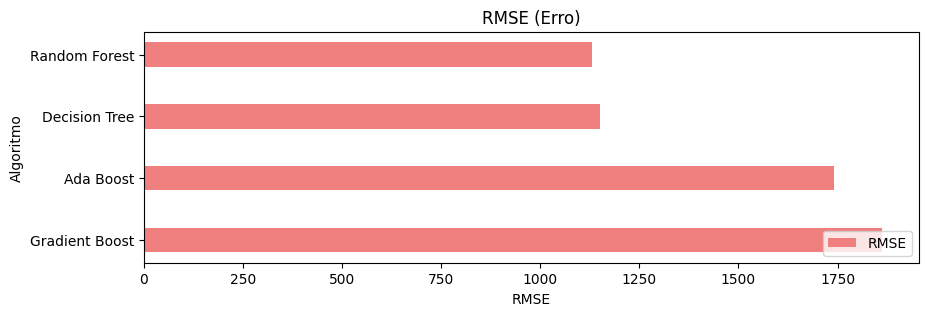

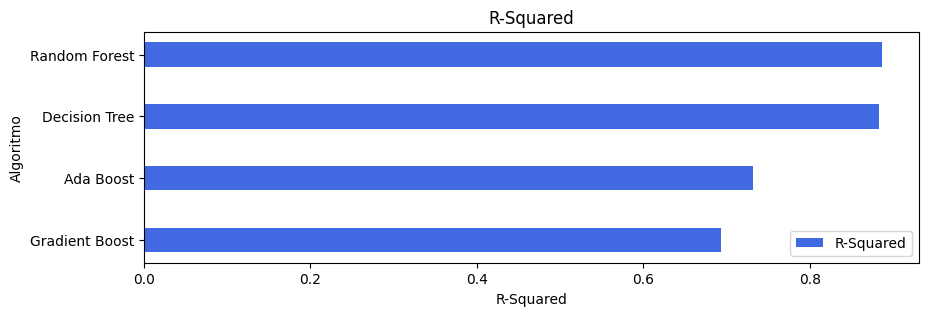

,Random Forest,Ada Boost,Decision Tree,Gradient Boost
RMSE,1131.416073,1740.786893,1149.596070,1862.052125
R-Squared,0.886819,0.732071,0.883153,0.693442


In [18]:
# Definimos um dataframe com as métricas de cada um
metrics = pd.DataFrame({
    "Random Forest": [random_forest_rmse, random_forest_rsquared], 
    "Ada Boost": [ada_boost_rmse, ada_boost_rsquared],
    "Decision Tree": [decision_tree_rmse, decision_tree_rsquared],
    "Gradient Boost": [gradient_boost_rmse, gradient_boost_rsquared],
}, index=["RMSE", "R-Squared"])


# Selecionamos a linha do RMSE
rmse_metrics = metrics.loc["RMSE"]

# Ordenamos em ordem descendente (menor ao maior)
rmse_metrics_sorted = rmse_metrics.sort_values(ascending=False)

# Criamos o gráfico do RMSE comparando os algoritmos
plt.figure(figsize=(10, 3))
plt.barh(rmse_metrics_sorted.index, rmse_metrics_sorted.values, height=0.4, color='lightcoral', label='RMSE')
plt.xlabel('RMSE')
plt.ylabel('Algoritmo')
plt.title('RMSE (Erro)')
plt.legend(loc='lower right')
plt.show()

# Selecionamos a linha do R-Squared
rsquared_metrics = metrics.loc["R-Squared"]

# Ordenamos em ordem ascendente (maior ao menor) 
rsquared_metrics_sorted = rsquared_metrics.sort_values()

# Criamos o gráfico do R-Squared comparando os algoritmos
plt.figure(figsize=(10, 3))
plt.barh(rsquared_metrics_sorted.index, rsquared_metrics_sorted.values, height=0.4, color='royalblue', label='R-Squared')
plt.xlabel('R-Squared')
plt.ylabel('Algoritmo')
plt.title('R-Squared')
plt.legend(loc='lower right')
plt.show()


metrics.head()

### Visualização das predições realizadas pelo Random Forest

Como o Random Forest obteve o menor erro (por pouco, comparado ao Decision Tree), criaremos um gráfico comparando as predições do Random Forest para cada semana epidemológica entre os anos 2018 e 2023.

In [24]:
# Criar um DataFrame com as semanas epidemiológicas de 2018 a 2023
years = [2018] * 52 + [2019] * 52 + [2020] * 52 + [2021] * 52 + [2022] * 52 + [2023] * 52
weeks = list(range(1, 53)) * 6

# Garantir que as listas tenham o mesmo comprimento
if len(years) > len(weeks):
    years = years[:len(weeks)]
elif len(weeks) > len(years):
    weeks = weeks[:len(years)]

# Criar o dataframe com as mesmas características (features) que foram usadas durante o treinamento, 
weeks_2018_2023 = pd.DataFrame({'se_notif': weeks, 'ano_notif': years, 'temp_med': 0, 'umid_med': 0 })

# Prever os casos estimados para 2018 a 2023
y_pred_2018_2023 = random_forest.predict(weeks_2018_2023)
weeks_2018_2023['casos_pred'] = y_pred_2018_2023

# Filtrar os casos notificados entre 2018 e 2023
casos_notif_2018_2023 = df_vis[df_vis['ano_notif'].between(2018, 2023)]

# Selecionar colunas relevantes para o dataframe com os casos estimados: weeks_2018_2023
cols =["se_notif",  "ano_notif",  "casos_pred"]

# Mesclar os DataFrames de casos estimados e notificados
merged_2018_2023 = pd.merge(weeks_2018_2023[cols], casos_notif_2018_2023, on=['ano_notif', 'se_notif'], how='left')


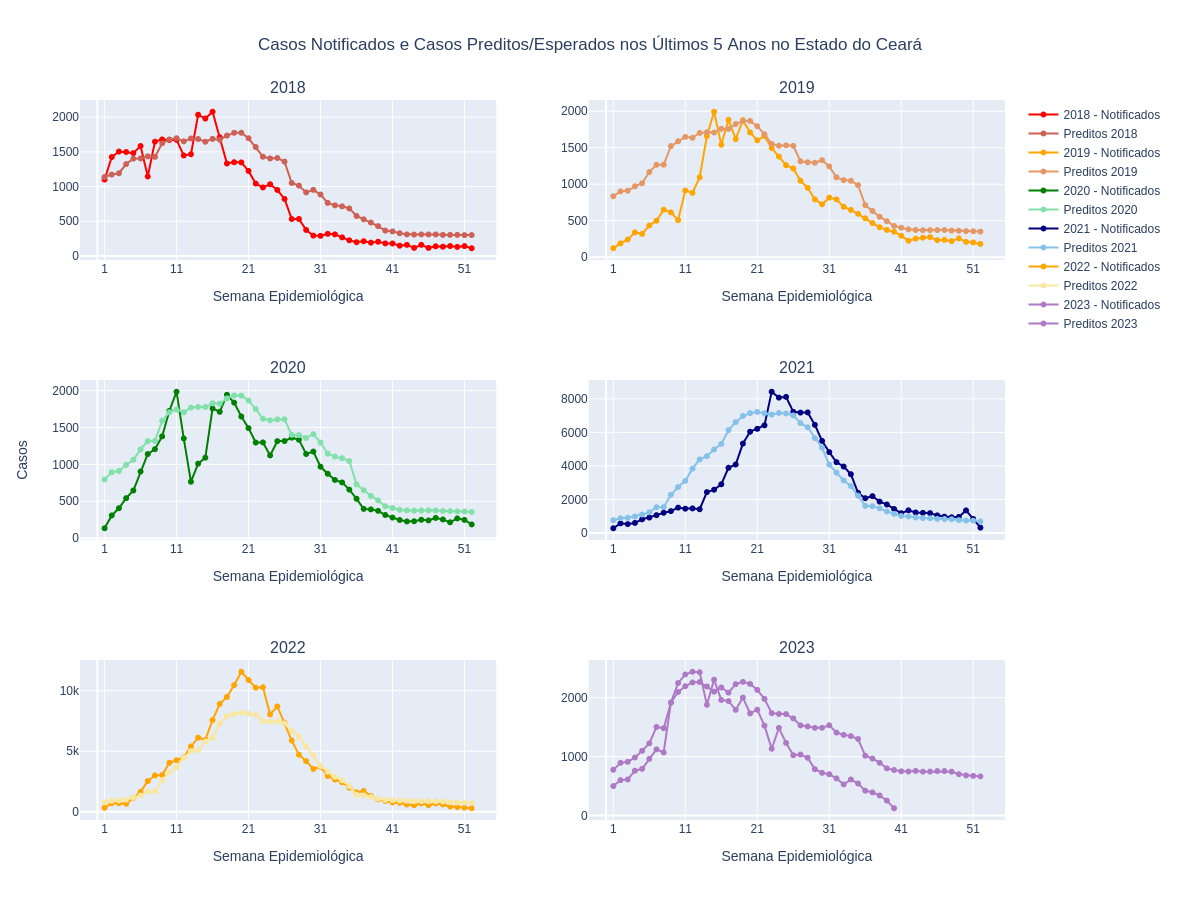

In [27]:
# Mapear as cores para os anos e os casos estimados
colors = {
    2018: 'rgba(255, 0, 0, 1)',  # Vermelho forte
    'Estimados 2018': 'rgb(205, 97, 85)',  # Vermelho fraco
    2019: 'rgba(255, 165, 0, 1)',  # Laranja forte
    'Estimados 2019': 'rgb(229, 152, 102)',  # Laranja fraco
    2020: 'rgba(0, 128, 0, 1)',  # Verde forte
    'Estimados 2020': 'rgb(130, 224, 170)',  # Verde fraco
    2021: 'rgba(0, 0, 128, 1)',  # Azul forte
    'Estimados 2021': 'rgb(133, 193, 233)',  # Azul fraco
    2022: 'rgba(255, 165, 0, 1)',  # Amarelo forte
    'Estimados 2022': 'rgb(249, 231, 159)',  # Amarelo fraco
    2023: 'rgba(175, 122, 197, 1)',  # Marrom forte
    'Estimados 2023': 'rgb(175, 122, 197)'  # Marrom fraco
}

# Lista para armazenar os gráficos
figs = []

# Configurar o layout de subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=['2018', '2019', '2020', '2021', '2022', '2023'])

# Adicionar cada ano como um gráfico independente
for i, ano in enumerate([2018, 2019, 2020, 2021, 2022, 2023]):
    df_ano = merged_2018_2023[(merged_2018_2023['ano_notif'] == ano) & (merged_2018_2023['se_notif'] <= 52)]

    # Adicionar casos notificados
    trace1 = go.Scatter(x=df_ano['se_notif'], y=df_ano['casos_notif'], mode='lines+markers',
                       name=str(ano) + ' - Notificados',
                       line=dict(color=colors[ano]),
                       text=df_ano["ano_notif"],
                       customdata=df_ano['se_notif'],
                       hovertemplate='Ano: %{text}<br>SE: %{customdata}<br>Casos Notificados: %{y}'"<extra></extra>"
                       )

    # Adicionar casos estimados
    trace2 = go.Scatter(x=df_ano['se_notif'], y=df_ano['casos_pred'].astype(int), mode='lines+markers',
                       name='Preditos ' + str(ano),
                       line=dict(color=colors['Estimados ' + str(ano)]),
                       text=df_ano["ano_notif"],
                       customdata=df_ano['se_notif'],
                       hovertemplate='Ano: %{text}<br>SE: %{customdata}<br>Casos Estimados: %{y}'"<extra></extra>"
                       )

    # Adicionar traces ao subplot correspondente
    fig.add_trace(trace1, row=i // 2 + 1, col=i % 2 + 1)
    fig.add_trace(trace2, row=i // 2 + 1, col=i % 2 + 1)

# Atualizar o layout geral
fig.update_layout(height=900, width=1000, showlegend=True)

# Adicionar rótulos de eixos e título
fig.update_xaxes(title_text='Semana Epidemiológica', tickvals=list(range(1, 53, 10)))
fig.update_yaxes(title_text='Casos', row=2, col=1)
fig.update_layout(title_text="Casos Notificados e Casos Preditos/Esperados nos Últimos 5 Anos no Estado do Ceará",
                  title_x=0.5)

fig.show()


---

### Conclusão 

#### Explorando Melhorias e Superando Desafios Futuros na Predição

Em futuros trabalhos, há várias oportunidades para aprimorar nosso modelo de predição de doenças epidemiológicas. Podemos investigar como o modelo se comportaria ao ajustar suas variáveis, incluindo ou excluindo novos parâmetros. Além disso, a segmentação dos dados em intervalos temporais distintos, como quinzenais, trimestrais e semestrais, bem como a consideração das variações sazonais relacionadas às estações climáticas. Outra abordagem interessante envolve a inclusão de variáveis meteorológicas adicionais, como sensação térmica, precipitação de chuvas, índices agregados e muito mais. Uma limitação comum nos modelos de previsão de doenças é a complexidade das variáveis relacionadas à disseminação, como a migração entre municípios em regiões metropolitanas. Uma abordagem futura é aplicar técnicas de agrupamento para categorizar os dados por municípios, unidades federativa e regionais, permitindo uma análise mais detalhada das tendências epidemiológicas.

### Considerações Finais

Em suma, a aplicação da técnica de machine learning utilizando o algoritmo Random Forest da biblioteca scikit-learn, revelou-se uma ferramenta eficaz e promissora. Os resultados obtidos sugerem insights valiosos para entender e antecipar padrões sazonais e variações na propagação da dengue. Ao analisar e comparar as previsões obtidas pela ferramenta, observou-se uma consistência notável nos resultados dos anos de 2018, 2020, 2022 e 2023, indicando picos, ascensões e declínios da doença muito próximos aos casos notificados. Isso mostra a robustez do modelo Random Forest na abordagem desse desafio de saúde pública. A precisão alcançada nas previsões de longo prazo destaca o potencial dessa abordagem para apoiar estratégias proativas de controle da dengue. É crucial ressaltar que, embora os resultados sejam encorajadores, o sucesso da aplicação desta ferramenta dependerá de melhorias futuras. Dentro do escopo proposto neste projeto, foi limitado a analisar os dados de maneira ampla, ou seja, sem considerar aspectos específicos de cada município. A consideração cuidadosa de fenômenos naturais e indicadores relacionados é imperativa para fortalecer a pesquisa. Nesse sentido, recomenda-se buscar a orientação de especialistas em Meteorologia e Climatologia, visando adquirir uma compreensão aprofundada do impacto das condições climáticas, especialmente da temperatura, no contexto do estudo. Adicionalmente, a contribuição de profissionais especializados em Entomologia, Ecologia, Ciência Ambiental e Biologia é essencial para um entendimento mais abrangente do comportamento do mosquito em relação ao ambiente proposto. Essa abordagem multidisciplinar garantirá uma análise mais robusta e completa dos fatores que afetam a proliferação do mosquito, aprimorando assim a qualidade e relevância da pesquisa. Conclui-se, portanto, que a aplicação de modelos de machine learning, como o Random Forest, mostra-se promissora na previsão da incidência de dengue. A contínua pesquisa e aplicação dessas técnicas podem moldar positivamente as estratégias de saúde pública e contribuir para um futuro mais resiliente contra ameaças epidemiológicas.


---

### Referências Bibliográficas

1. Nogueira, Rodrigo. **Machine learning I - Classificação e Regressão**. 1ª Edição. Indaial: Centro Universitário Leonardo da Vinci, 2020.

2. Costa, Simone. **Preparação e Análise Exploratória de Dados**. 1ª Edição. Indaial: Centro Universitário Leonardo da Vinci, 2020.

3. Instituto Fio Cruz - [**O mosquito Aedes aegypti faz parte da história e vem se espalhando pelo mundo desde o período das colonizações**](https://www.ioc.fiocruz.br/dengue/textos/longatraje.html)

4. Ministério da Saúde - [**Saúde de A a Z - Dengue**](https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/d/dengue)

5. Nações Unidas - [**OMS: Brasil é o país mais afetado em novo surto de dengue nas Américas**](https://news.un.org/pt/story/2023/07/1817882), 21 de Julho de 2023

6. IBGE Instituto Brasileiro de Geografia e Estatística - [População no último censo [2022]](https://cidades.ibge.gov.br/brasil/ce/panorama)